In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B841-0E2D

 Directory of C:\Users\SANVI\Documents\ExelR Assignment\Decision Trees

02-05-2022  09.36 PM    <DIR>          .
02-05-2022  09.36 PM    <DIR>          ..
02-05-2022  09.36 PM    <DIR>          .ipynb_checkpoints
20-04-2022  09.46 PM            17,023 Company_Data.csv
29-04-2022  05.30 PM           551,297 Decision Tree_fraudcheck.ipynb
29-04-2022  05.30 PM         1,676,614 DT_company_data.ipynb
02-05-2022  09.36 PM                72 dt_fraudcheck.ipynb
20-04-2022  09.46 PM            21,837 Fraud_check.csv
20-04-2022  09.46 PM             1,377 problem statement(company data).txt
20-04-2022  09.46 PM               460 Problem_statement(Fraudcheck).txt
               7 File(s)      2,268,680 bytes
               3 Dir(s)  101,675,655,168 bytes free


In [3]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data = pd.get_dummies(data, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [6]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

(array([476.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

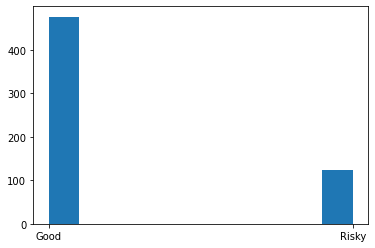

In [7]:
plt.hist(data['TaxInc'])

In [8]:
X=data.iloc[:,1:6]
y=data['TaxInc']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.33, random_state= 5)

In [20]:
y_train

47      Good
495     Good
480     Good
21     Risky
585     Good
       ...  
8       Good
73      Good
400     Good
118    Risky
206     Good
Name: TaxInc, Length: 402, dtype: category
Categories (2, object): ['Risky' < 'Good']

[Text(125.55000000000001, 190.26, 'X[1] <= 0.5\nentropy = 0.749\nsamples = 402\nvalue = [316, 86]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(167.4, 135.9, 'X[0] <= 140941.5\nentropy = 0.761\nsamples = 390\nvalue = [304, 86]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 140702.0\nentropy = 0.806\nsamples = 288\nvalue = [217, 71]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.797\nsamples = 286\nvalue = [217, 69]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 153660.5\nentropy = 0.602\nsamples = 102\nvalue = [87, 15]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.677\nsamples = 84\nvalue = [69, 15]')]

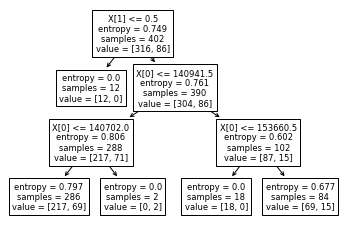

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train, y_train)
tree.plot_tree(model)

In [11]:
y_train.value_counts()

Good     316
Risky     86
Name: TaxInc, dtype: int64

In [16]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

Good    198
dtype: int64

In [17]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
TaxInc,
Risky,38
Good,160


In [18]:
np.mean(preds==y_test)

0.8080808080808081